# What are those cells doing?

### This lesson will download a dataset from the Allen Brain Institute's "Software Development Kit," or SDK.

These datasets contain calcium imaging data for various different cell types in the visual cortex of the mouse. It's likely that these cell types have different roles in the visual system -- your mission is to figure out what these roles are. You will choose a visual area, a cell type, and a type of visual stimulus:

<img src="ExperimentalDesign.png">  

### By the end of this lesson, you will be able to:
1. Choose a dataset for a particular cell type and save it locally.
2. Plot a stimulus-response curve for one neuron.

Additional information on this dataset, and how it was collected, can be found here: http://help.brain-map.org/display/observatory/Data+-+Visual+Coding


## 1. Importing toolboxes
<b>First, we'll import the necessary toolboxes to run this code.</b> The first chunk of "import" lines will bring in some standard toolboxes that we need. For example, "numpy" is a toolbox that has functions to work with large arrays (https://en.wikipedia.org/wiki/NumPy). The second chunk of import lines brings in some toolboxes that the Allen Brain Observatory has already packaged, to help users analyze its data.

In [1]:
# Standard toolboxes
import pprint
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import h5py
import pandas as pd
import os
# This class uses a 'manifest' to keep track of downloaded data and metadata.  
# All downloaded files will be stored relative to the directory holding the manifest
# file.  If 'manifest_file' is a relative path (as it is below), it will be 
# saved relative to your working directory.  It can also be an absolute path.

# Allen specific toolboxes
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.natural_scenes import NaturalScenes
from allensdk.brain_observatory.drifting_gratings import DriftingGratings
from allensdk.brain_observatory.static_gratings import StaticGratings

# We will save the Brain Observatory Cache as a variable, "boc."
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
cwd = os.getcwd()
print('Successfully imported AllenSDK packages.')

Successfully imported AllenSDK packages.


## 2. Get a list of all possible trangenic mouse lines and brain areas, and choose which to work with.
Next, we'll ask that "boc" structure to tell us what all of the possible Cre lines and brain areas are that we can analyze. You'll need to use these exact names when you're trying to pull a specific one from the dataset.

More info on Cre lines can be found here:
http://help.brain-map.org/display/observatory/Transgenic+Mouse+Lines

In [2]:
# We'll save the list of cre lines as a variable, 'cre-lines'.
cre_lines = boc.get_all_cre_lines()
print("all cre lines: " + str(cre_lines))

# We'll save the list of possible structures as a variable, 'brain_areas'.
brain_areas = boc.get_all_targeted_structures()
print("all brain regions: " + str(brain_areas))

all cre lines: [u'Cux2-CreERT2', u'Emx1-IRES-Cre', u'Nr5a1-Cre', u'Rbp4-Cre_KL100', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']
all brain regions: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b>  Choose a visual area and Cre line from the lists above to examine in the rest of the notebook. You need to type these with single quotes around them, e.g. 'VISp'.
</div>

In [4]:
visual_area = 'VISp'
cre_line = 'Scnn1a-Tg3-Cre'
visual_stim = 'natural_scenes'
print("Let's take a look at how " + str(cre_line) + " cells in " + visual_area + " respond to " + visual_stim)

Let's take a look at how Scnn1a-Tg3-Cre cells in VISp respond to natural_scenes


<p>
<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b>  Get the list of all the experiment containers for that area and Cre line combination.
</div>

In [5]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line],)
#make a pandas DataFrame to see what information we have on these experiments
pd.DataFrame(exps)

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Scnn1a-Tg3-Cre,230570,False,511510911,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570,[],VISp
1,Scnn1a-Tg3-Cre,246775,False,528889127,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-246775,[],VISp
2,Scnn1a-Tg3-Cre,262562,False,546724786,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-262562,[],VISp
3,Scnn1a-Tg3-Cre,231951,False,511510955,275,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231951,[],VISp
4,Scnn1a-Tg3-Cre,221470,False,511507811,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-221470,[],VISp
5,Scnn1a-Tg3-Cre,250789,False,535575493,275,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-250789,[],VISp
6,Scnn1a-Tg3-Cre,250789,False,540993888,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-250789,[],VISp
7,Scnn1a-Tg3-Cre,231953,False,511498742,350,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231953,[],VISp
8,Scnn1a-Tg3-Cre,246775,False,531134088,335,Ai93(TITL-GCaMP6f),Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-246775,[],VISp


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b>  Pick a random experiment from this selection
</div>

In [11]:
expt_container_id = np.random.choice(exps)['id']
expt_container_id = 546724786
print(expt_container_id)

546724786


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Get information about all of the experiment <strong>sessions</strong> in your experiment <strong>container</strong>.  This is accomplished with the `get_ophys_experiments` method.  
</div>

In [12]:
expt_session_info = boc.get_ophys_experiments(experiment_container_ids=[expt_container_id])
expt_session_info_df = pd.DataFrame(expt_session_info)
expt_session_info_df

,acquisition_age_days,cre_line,donor_name,experiment_container_id,fail_eye_tracking,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,104,Scnn1a-Tg3-Cre,262562,546724786,True,547573479,350,Ai93(TITL-GCaMP6f),three_session_B,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-262562,VISp
1,103,Scnn1a-Tg3-Cre,262562,546724786,True,547388708,350,Ai93(TITL-GCaMP6f),three_session_A,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-262562,VISp
2,109,Scnn1a-Tg3-Cre,262562,546724786,True,549483412,350,Ai93(TITL-GCaMP6f),three_session_C2,Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-262562,VISp


## 3. Download your dataset.

Now that we've chosen a cell type and brain area, we need to download a dataset that contains data for that cell type, in that brain area. The data_set object contains methods and info for a single experiment session.

<b>Choose one of the experiments above that has a session type "three_session_B" and enter it below.</b><p>
<b>Note: It will take ~10 minutes for the experiment to download.</b>
</div>

In [14]:
session_id = 547573479
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

2018-09-20 15:35:05,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/549288655


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task:</b> Get the mean response for each cell, to each different stimulus. Fortunately, this is already saved for us.
</div>

In [ ]:
ns = NaturalScenes(data_set)
#mean_sweep_response = ns.mean_sweep_response
#mean_sweep_response

Now we'll organize the stimulus table. This tells us which stimulus was played on each trial. This data set has 118 different scenes, and each scene is presented 50 times. Images of the scenes can be found here: http://observatory.brain-map.org/visualcoding/stimulus/natural_scenes


In [17]:
stim_table = data_set.get_stimulus_table('natural_scenes')
scenes = data_set.get_stimulus_template('natural_scenes')
sceneIDs = np.unique(stim_table.frame)
stim_table.shape

(5950, 3)

In [18]:
# We'll decide on a few experimental variables
interlength = 7 # in frames, 0.25 secs
stim_length = 7 # in frames, 0.25 secs
sweep_length = stim_length + interlength

In [19]:
time,dffTraces = data_set.get_dff_traces() #get traces . dffTraces is cells by time
cell_ids = data_set.get_cell_specimen_ids()
numCells = len(cell_ids)
nTrials = len(stim_table)
y = np.empty((nTrials))
y[:] = np.nan
trials_per_scene = nTrials/len(sceneIDs)
XT_exp = np.empty((nTrials,numCells,sweep_length))

In [22]:
for scene in sceneIDs:
    trial_mask = (stim_table.frame == scene)
    this_stim_table = stim_table[trial_mask]
    for t in np.arange(0,trials_per_scene+1):
        trial = t + (scene + 1) * trials_per_scene - 1
        y[trial] = scene + 1
        for cell in np.arange(0,numCells):
            stim_on = this_stim_table.start.iloc[t-1] 
            start_sweep = stim_on - interlength
            end_sweep = stim_on + stim_length
            trange = np.arange(start_sweep ,end_sweep)
            XT_exp[trial,cell,:] = dffTraces[cell,trange]

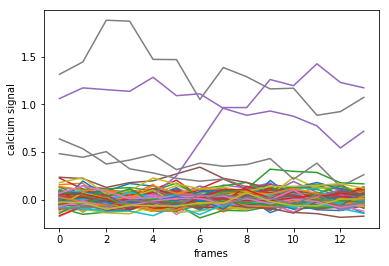

In [56]:
single_timecourse = XT_exp[1,1,:]
this_cell = XT_exp[:,1,:]
# plt.plot(single_timecourse)
expt_mean = np.mean(XT_exp,axis=0)
for scene in sceneIDs:
    plt.plot(XT_exp[scene,3,:])
    plt.xlabel('frames')
    plt.ylabel('calcium signal')
    plt.hold


In [ ]:
ns = NaturalScenes(data_set)
mean_sweep_response = ns.mean_sweep_response

NameError: name 'stim_off' is not defined

## get natural scenes delta F/F
1. save df/f traces for cells in given area
2. get cells and save. 
3. skip if data already saved. 

_this will take a bit of time_

In [ ]:
interlength = 7 #in frames, 0.25 secs
stim_length = 7 #frames, 0.25 secs
sweep_length = 2*interlength+stim_length #in frames, 1secs

for aa in range(len(areas)):
    this_area = areas[aa]
    
    for cc in range(len(cre_lines)):
        this_cre_line = cre_lines[cc]
        X_ALL = []
        XT_ALL = []
        Y_ALL = []
        cells_all = []
        total_num_cells = 0
        
        exps = boc.get_ophys_experiments(targeted_structures=[this_area],stimuli=[stim_info.NATURAL_SCENES],
                                cre_lines=[this_cre_line],)
        num_exps = len(exps)

        for ee in range(num_exps):
            
            exps = boc.get_ophys_experiments(targeted_structures=[this_area],stimuli=[stim_info.NATURAL_SCENES],
                                             cre_lines=[this_cre_line])[ee]
            expData = boc.get_ophys_experiment_data(exps['id'])
            time,dffTraces = expData.get_dff_traces() #get traces . dffTraces is cells by time

            #118 scenes, each scene presented 50 times. there is a scene labeled -1 in stimulus table, must be blank
            stim_table = expData.get_stimulus_table('natural_scenes')
            scenes = expData.get_stimulus_template('natural_scenes')
            sceneIDs = np.unique(stim_table.frame)
            cell_ids = expData.get_cell_specimen_ids()
            numCells = len(cell_ids)
            total_num_cells = numCells + total_num_cells
            nTrials = len(stim_table)
            y = np.empty((nTrials))
            y[:] = np.nan
            trials_per_scene = nTrials/len(sceneIDs)
            XT_exp = np.empty((nTrials,numCells,sweep_length))

            for scene in sceneIDs:
                trial_mask = (stim_table.frame == scene)
                this_stim_table = stim_table[trial_mask]
                for t in np.arange(1,trials_per_scene+1):
                    trial = t + (scene + 1) * trials_per_scene - 1
                    y[trial] = scene + 1
                    for cell in np.arange(0,numCells):
                        stim_on = this_stim_table.start.iloc[t-1] 
                        start_sweep = stim_on - interlength #start one second (28 frames) before stimulus onset
                        end_sweep = stim_on + stim_length + interlength   #end 
                        trange = np.arange(start_sweep ,end_sweep)
                        XT_exp[trial,cell,:] = dffTraces[cell,trange]

            #concatenate experiments
            if ee == 0:
                XT_ALL = XT_exp
                Y_ALL = y
                cells_all = cell_ids
            if ee > 0:
                XT_ALL = np.hstack((XT_ALL,XT_exp))
                Y_ALL = np.vstack((Y_ALL,y))
                cells_all = np.hstack((cells_all,cell_ids))

        print(this_area + ',  ' + this_cre_line + ': ' + str(numCells) + ' cells')
        filename = this_area +'_'+ this_cre_line + '_' + str(exps['id']) + '_naturalScenes.h5'
    
        #save arrays X_ALL & XT_ALL -make this into function
        with h5py.File(filename,'w') as hf:
            hf.create_dataset('X_matrix_time', data=XT_exp,chunks=True)
            hf.create_dataset('Y_matrix', data=y,chunks=True)
            hf.create_dataset('cell_IDs', data=cell_ids,chunks=True)